# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy+

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'citipy+'


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cody
Processing Record 2 of Set 1 | nemuro
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | freeport
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | brisas de zicatela
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | marka
Processing Record 15 of Set 1 | necochea
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | nova vicosa
Processing Record 20 of Set 1 | lubao
Processing Record 21 of Set 1 | thunder bay
Processing Record 22 of Set 1 | udachny
Processing Record 23 of Set

Processing Record 37 of Set 4 | ilhabela
Processing Record 38 of Set 4 | flekkefjord
Processing Record 39 of Set 4 | kununurra
Processing Record 40 of Set 4 | weno
Processing Record 41 of Set 4 | yangor
City not found. Skipping...
Processing Record 42 of Set 4 | gadzhiyevo
Processing Record 43 of Set 4 | acapulco de juarez
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | aitape
Processing Record 46 of Set 4 | ocean pointe
City not found. Skipping...
Processing Record 47 of Set 4 | yuzhno-kurilsk
Processing Record 48 of Set 4 | constantia
Processing Record 49 of Set 4 | crane
Processing Record 0 of Set 5 | kapuskasing
Processing Record 1 of Set 5 | agat village
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | makokou
Processing Record 4 of Set 5 | aykol
City not found. Skipping...
Processing Record 5 of Set 5 | ouellah
City not found. Skipping...
Processing Record 6 of Set 5 | aripuana
Processing Record 7 of Set 5 | geraldton
Processing Record 8 of 

Processing Record 29 of Set 8 | usinsk
Processing Record 30 of Set 8 | berezovyy
Processing Record 31 of Set 8 | egilsstadir
Processing Record 32 of Set 8 | potosi
Processing Record 33 of Set 8 | mangai
Processing Record 34 of Set 8 | ghanzi
Processing Record 35 of Set 8 | tommot
Processing Record 36 of Set 8 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 37 of Set 8 | nizhnesortymskiy
Processing Record 38 of Set 8 | qarqin
Processing Record 39 of Set 8 | lalibela
Processing Record 40 of Set 8 | galesong
Processing Record 41 of Set 8 | puerto carreno
Processing Record 42 of Set 8 | zhosaly
Processing Record 43 of Set 8 | quzhou
Processing Record 44 of Set 8 | palmer
Processing Record 45 of Set 8 | cole harbour
Processing Record 46 of Set 8 | marsh harbour
Processing Record 47 of Set 8 | douglas
Processing Record 48 of Set 8 | kalmunai
Processing Record 49 of Set 8 | palikir - national government center
Processing Record 0 of Set 9 | puerto san carlos
City not found. Skipp

Processing Record 15 of Set 12 | vila franca do campo
Processing Record 16 of Set 12 | upata
Processing Record 17 of Set 12 | anacapri
Processing Record 18 of Set 12 | adh dhibiyah
City not found. Skipping...
Processing Record 19 of Set 12 | bandarbeyla
Processing Record 20 of Set 12 | senanga
Processing Record 21 of Set 12 | pingliang
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | kruisfontein
Processing Record 24 of Set 12 | tayaman
Processing Record 25 of Set 12 | hermansverk
Processing Record 26 of Set 12 | beni
Processing Record 27 of Set 12 | kaintragarh
Processing Record 28 of Set 12 | mount pleasant
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cody,44.5263,-109.0565,52.92,37,20,19.57,US,1699731671
1,nemuro,43.3236,145.5750,34.74,71,4,13.02,JP,1699731673
2,puerto natales,-51.7236,-72.4875,48.65,40,75,18.41,CL,1699731674
3,hermanus,-34.4187,19.2345,60.30,85,33,10.42,ZA,1699731399
4,blackmans bay,-43.0167,147.3167,47.52,76,100,1.01,AU,1699731668


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cody,44.5263,-109.0565,52.92,37,20,19.57,US,1699731671
1,nemuro,43.3236,145.5750,34.74,71,4,13.02,JP,1699731673
2,puerto natales,-51.7236,-72.4875,48.65,40,75,18.41,CL,1699731674
3,hermanus,-34.4187,19.2345,60.30,85,33,10.42,ZA,1699731399
4,blackmans bay,-43.0167,147.3167,47.52,76,100,1.01,AU,1699731668


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

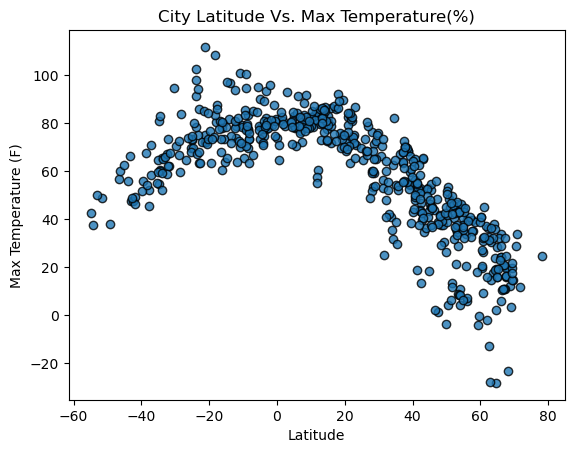

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", 
            linewidth=1, 
            marker="o",
           alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

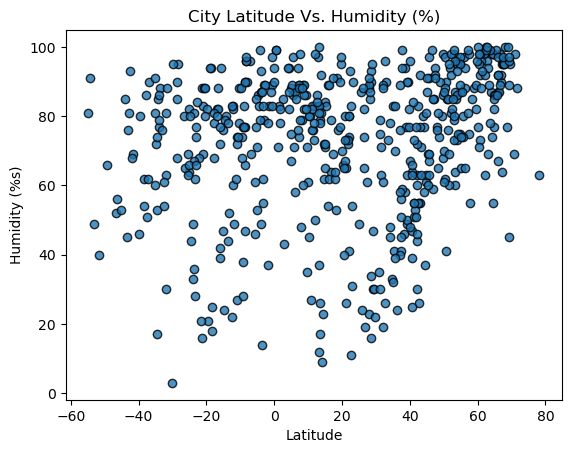

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", 
            linewidth=1, 
            marker="o",
           alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%)")
plt.ylabel("Humidity (%s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

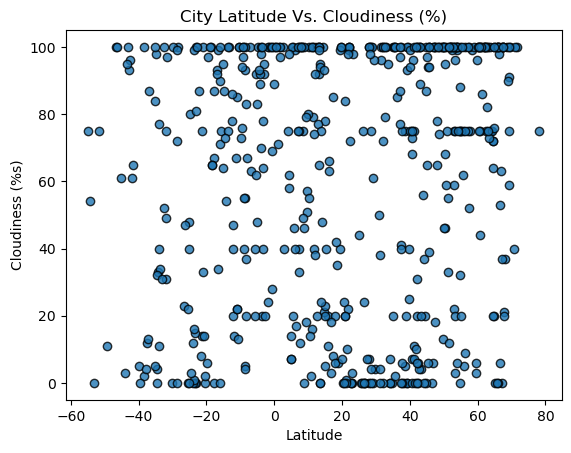

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", 
            linewidth=1, 
            marker="o",
           alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

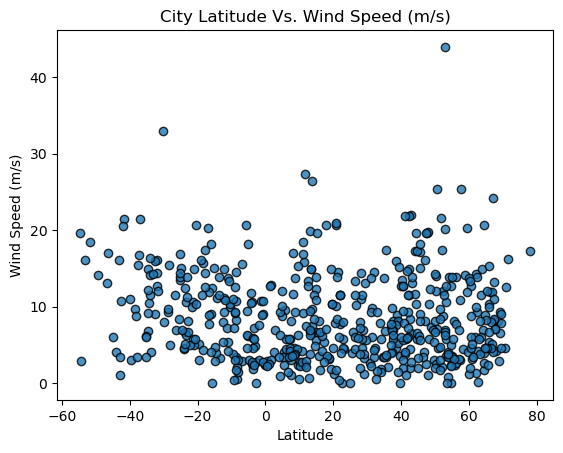

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", 
            linewidth=1, 
            marker="o",
           alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (m/s)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cody,44.5263,-109.0565,52.92,37,20,19.57,US,1699731671
1,nemuro,43.3236,145.5750,34.74,71,4,13.02,JP,1699731673
7,freeport,40.6576,-73.5832,56.25,47,75,12.66,US,1699731440
10,aasiaat,68.7098,-52.8699,11.95,77,100,8.08,GL,1699731667
11,brisas de zicatela,15.8369,-97.0419,86.52,54,20,8.05,MX,1699731687


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,48.65,40,75,18.41,CL,1699731674
3,hermanus,-34.4187,19.2345,60.30,85,33,10.42,ZA,1699731399
4,blackmans bay,-43.0167,147.3167,47.52,76,100,1.01,AU,1699731668
5,port lincoln,-34.7333,135.8667,54.41,72,98,14.90,AU,1699731678
6,tsiombe,-25.3000,45.4833,69.64,69,0,16.84,MG,1699731680


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8713299655947515


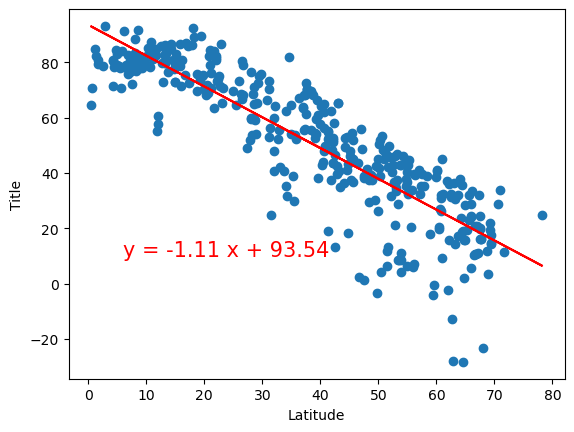

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,10))

The r-squared is: 0.6479268404289713


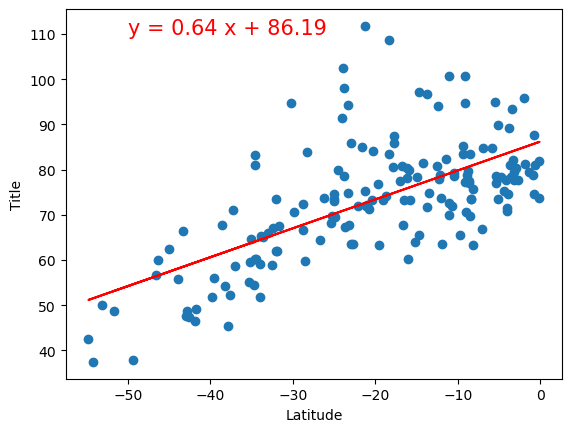

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,110))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.24156434639961993


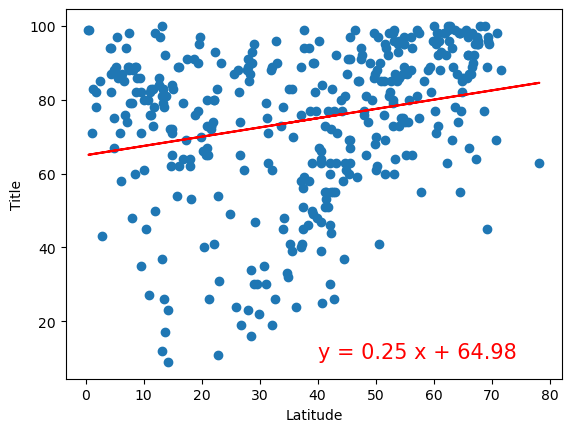

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Max Temp', (40,10))

The r-squared is: 0.12938757299124257


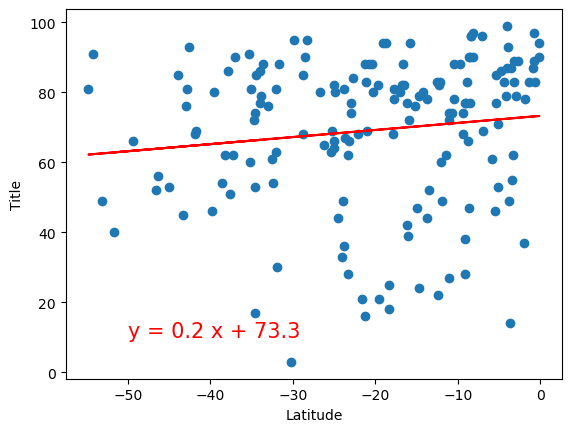

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16168801279267914


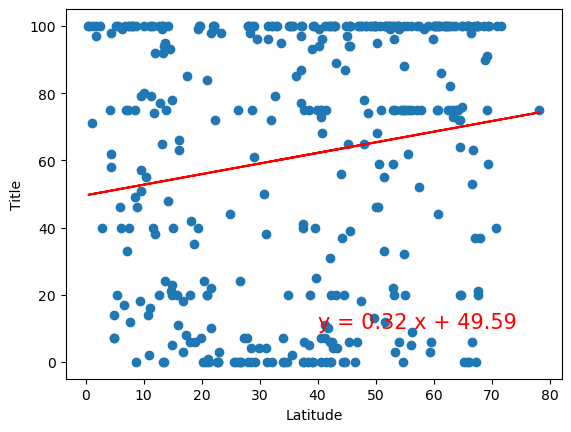

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Max Temp', (40,10))

The r-squared is: 0.21193362288025766


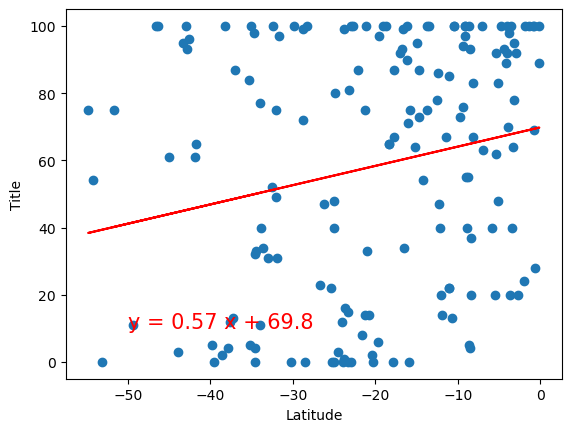

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.07836351116942857


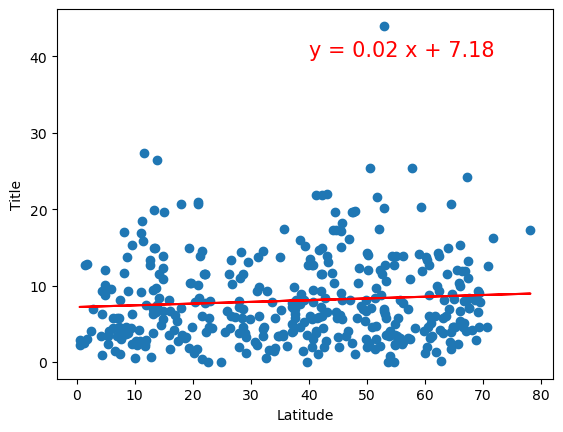

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Max Temp', (40,40))

The r-squared is: -0.3396061970065097


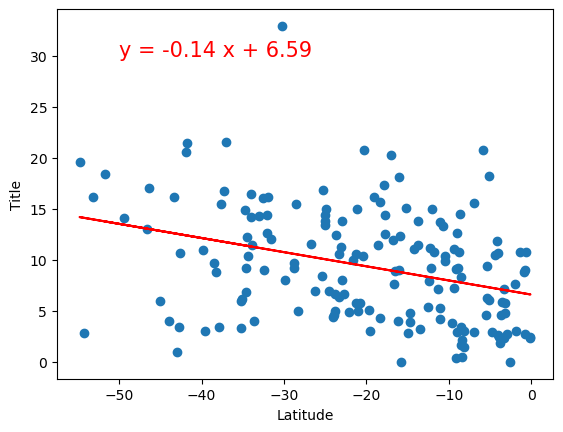

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE